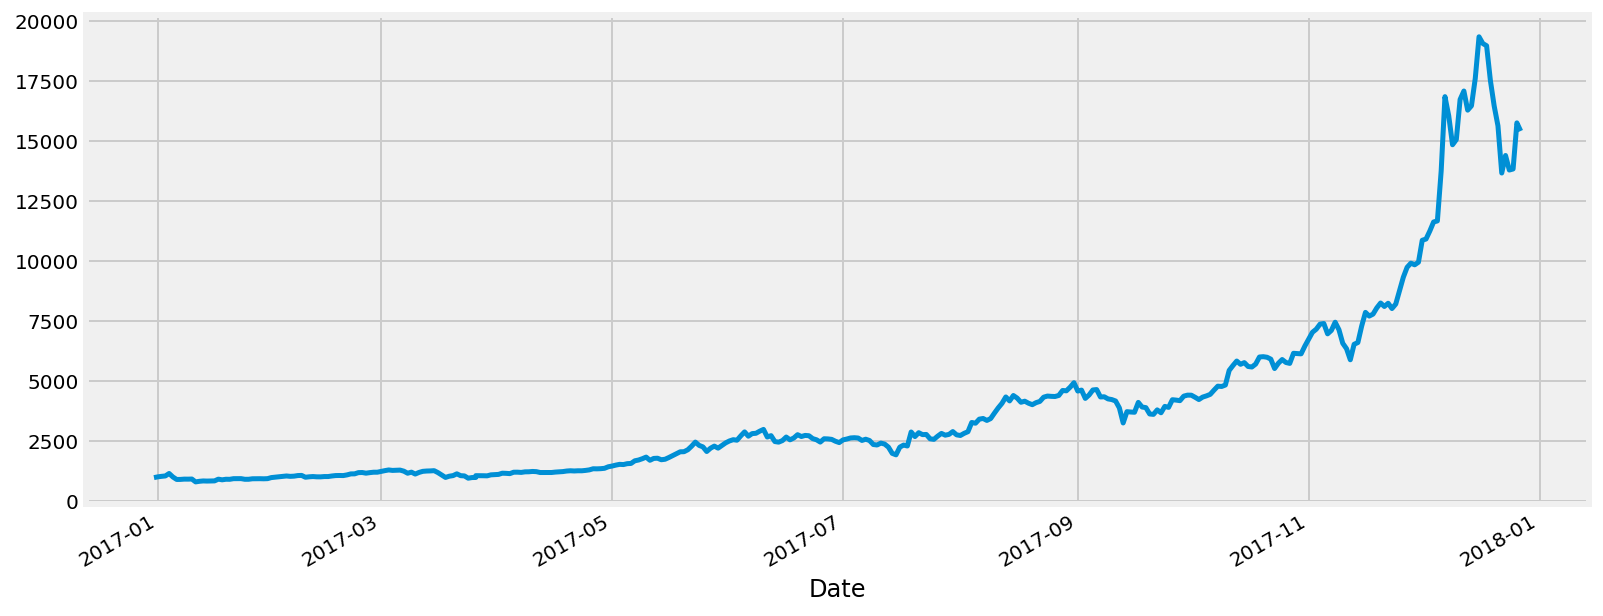

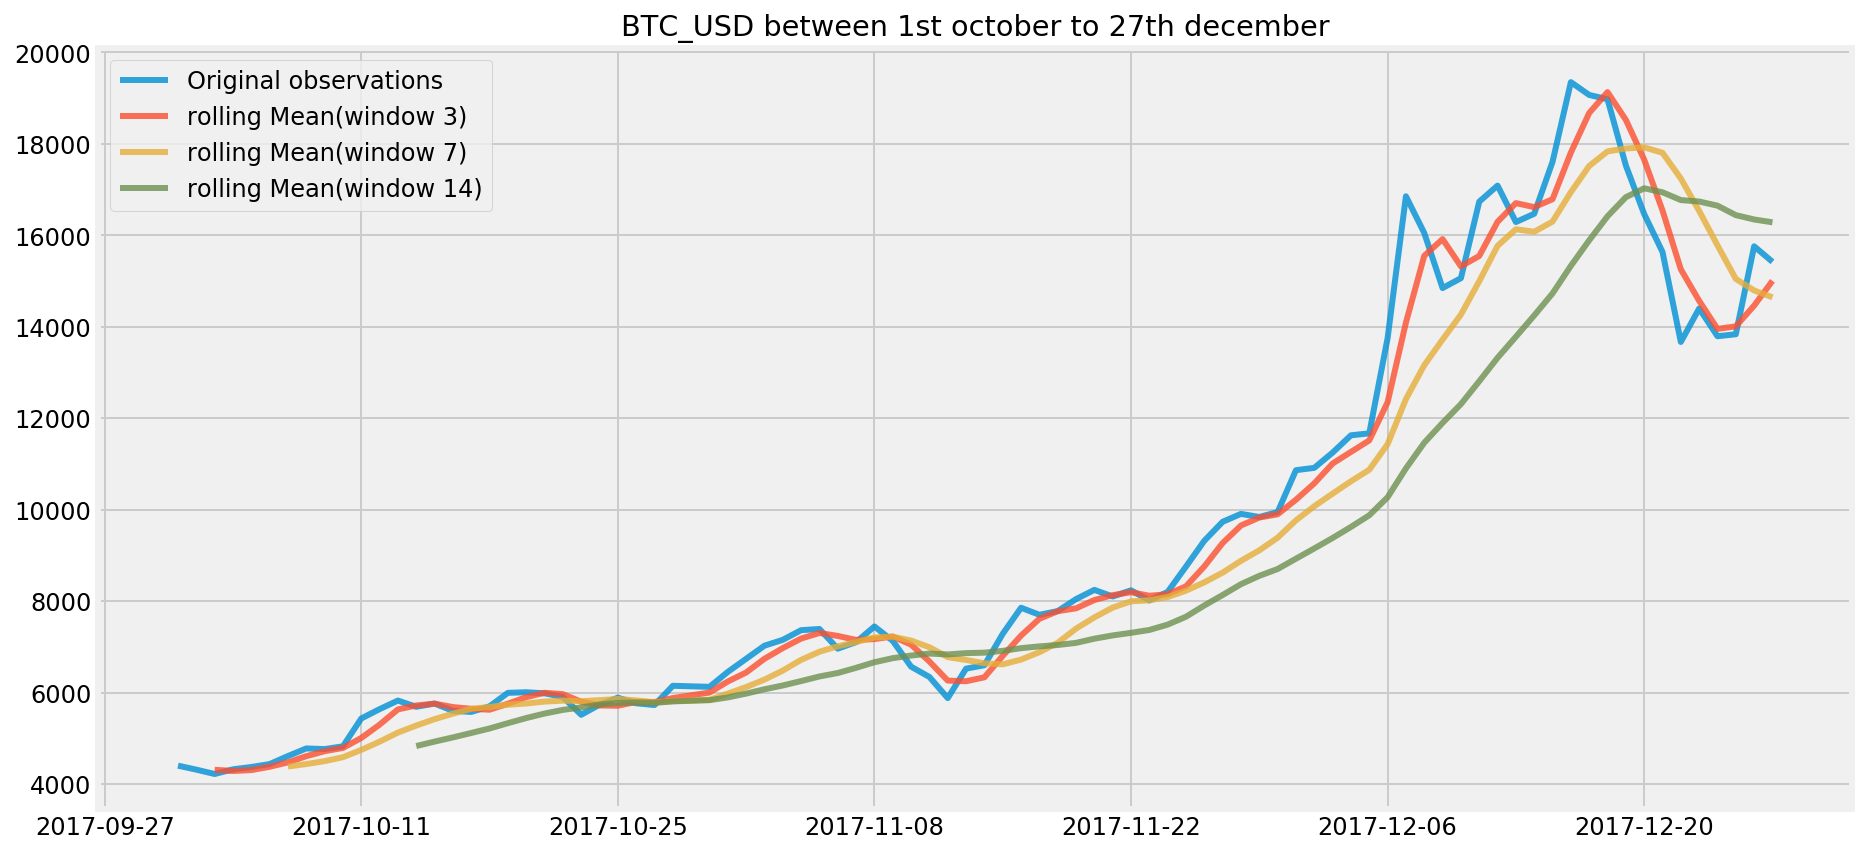

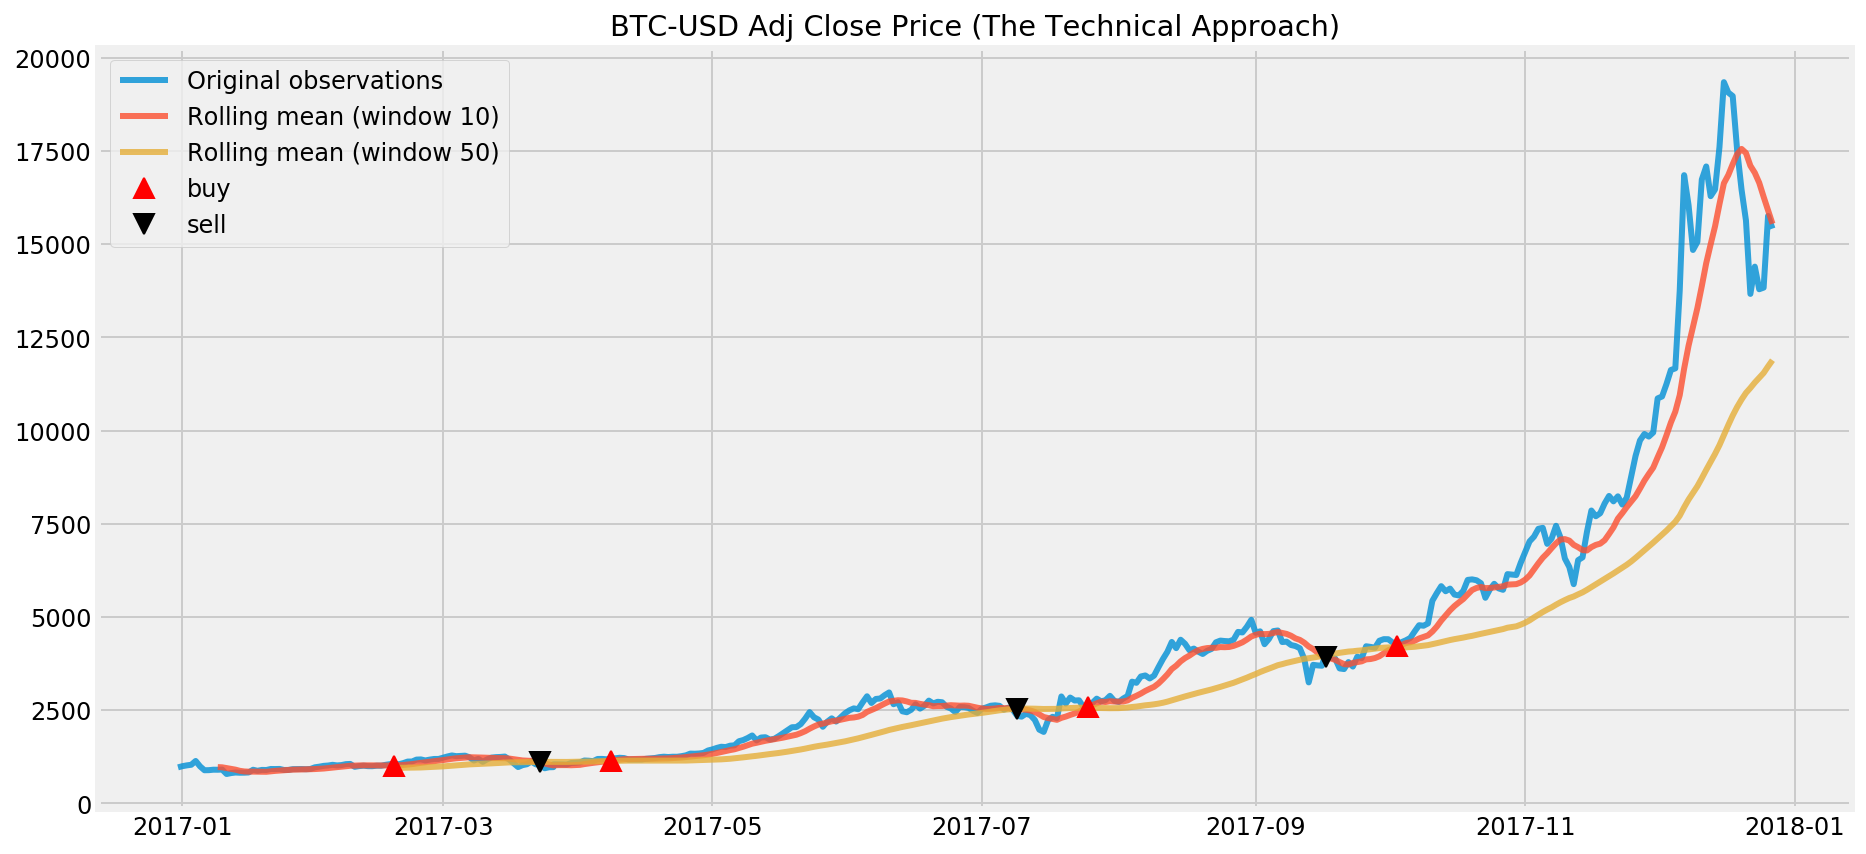

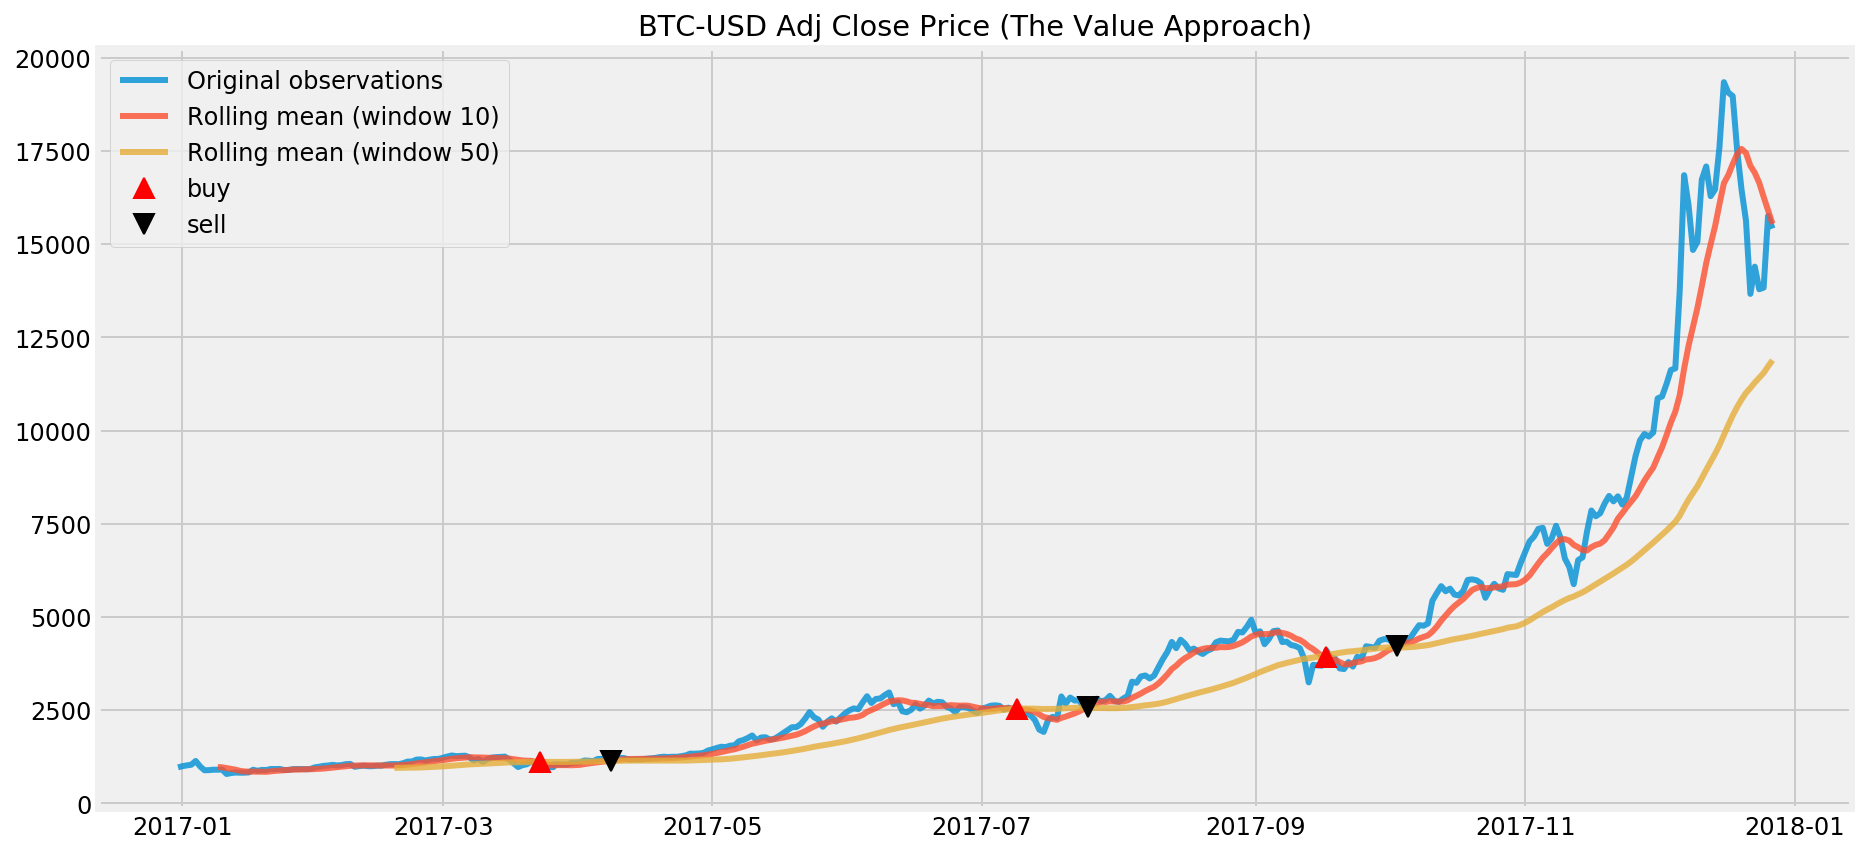

In [2]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

btc = web.get_data_yahoo('BTC-USD',
start=datetime.datetime(2017,1,1),
end = datetime.datetime(2017,12,27))
btc.head()
btc_adj = btc['Adj Close']
btc_adj.plot(lw=2.5, figsize=(12,5))
plt.show()
btc_recent=btc_adj.loc['2017-10-1': '2017-12-27']
rroll_d3 = btc_recent.rolling(window=3).mean()
rroll_d7 = btc_recent.rolling(window=7).mean()
rroll_d14 = btc_recent.rolling(window=14).mean()
plt.figure(figsize=(14,7))
plt.plot(btc_recent.index,btc_recent,lw=3,
        alpha = 0.8,label='Original observations')
plt.plot(btc_recent.index,rroll_d3,lw=3,
        alpha = 0.8,label='rolling Mean(window 3)')
plt.plot(btc_recent.index,rroll_d7,lw=3,
        alpha = 0.8,label='rolling Mean(window 7)')
plt.plot(btc_recent.index,rroll_d14,lw=3,
        alpha = 0.8,label='rolling Mean(window 14)')
plt.title('BTC_USD between 1st october to 27th december')
plt.tick_params(labelsize=12)
plt.legend(loc="upper left",fontsize=12)
plt.show()
short_window = 10
mid_window = 50
signals = pd.DataFrame(index = btc_adj.index)
signals['signal'] = 0.0
roll_d10 = btc_adj.rolling(window=short_window).mean()
roll_d50 = btc_adj.rolling(window = mid_window).mean()
signals['short_mavg'] = roll_d10
signals['mid_mavg'] = roll_d50
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] > signals['mid_mavg'][short_window:], 1.0, 0.0)
signals['positions'] = signals['signal'].diff()
plt.figure(figsize=(14, 7))
plt.plot(btc_adj.index, btc_adj, lw=3, alpha=0.8,label='Original observations')
plt.plot(btc_adj.index, roll_d10, lw=3, alpha=0.8,label='Rolling mean (window 10)')
plt.plot(btc_adj.index, roll_d50, lw=3, alpha=0.8,label='Rolling mean (window 50)')
plt.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='r', label='buy')
         
plt.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='k', label='sell')
plt.title('BTC-USD Adj Close Price (The Technical Approach)')
plt.tick_params(labelsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.show()
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] < signals['mid_mavg'][short_window:], 1.0, 0.0)
signals['positions'] = signals['signal'].diff()
plt.figure(figsize=(14, 7))
plt.plot(btc_adj.index, btc_adj, lw=3, alpha=0.8,label='Original observations')
plt.plot(btc_adj.index, roll_d10, lw=3, alpha=0.8,label='Rolling mean (window 10)')
plt.plot(btc_adj.index, roll_d50, lw=3, alpha=0.8,label='Rolling mean (window 50)')
plt.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='r', label='buy')
         
plt.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='k', label='sell')
plt.title('BTC-USD Adj Close Price (The Value Approach)')
plt.tick_params(labelsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.show()
